# Logistic Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
columns = ['Exam 1 Score', 'Exam 2 score', 'Result']
dataset = pd.read_csv('./ex2data1.txt', delimiter=',', header=None, names=columns)

## Training/Test set split

In [3]:
dataset['Intercept'] = np.ones((dataset.shape[0],1))
dataset = dataset.reindex(columns=['Intercept']+columns)
#dataset.insert(0,'Intercept',1)

In [4]:
shuffled_dataset = dataset.sample(frac=1)

In [5]:
X_train = shuffled_dataset.iloc[:int(shuffled_dataset.shape[0]*0.7), :3]
y_train = shuffled_dataset.iloc[:int(shuffled_dataset.shape[0]*0.7),[-1]]

X_test = shuffled_dataset.iloc[int(shuffled_dataset.shape[0]*0.7):,:3]
y_test = shuffled_dataset.iloc[int(shuffled_dataset.shape[0]*0.7):,[-1]]

## Plot Data

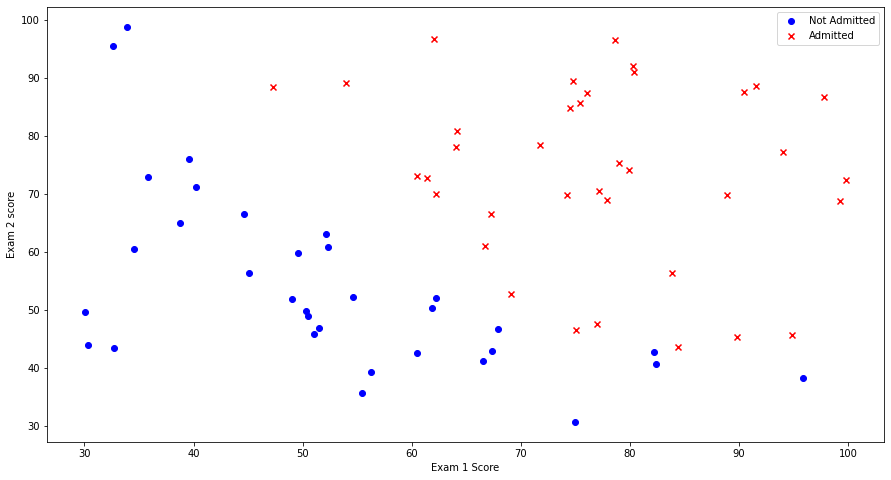

In [6]:
plt.figure(figsize=(15,8))

neg = X_train[y_train.Result == 0]
pos = X_train[y_train.Result == 1]

plt.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Not Admitted')
plt.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Admitted')
plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Logistic Regression Hypotesis

$$\large h_{\theta}(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)$$

$$\large g(z) = \frac{1}{1+e^{-z}}$$

In [7]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Logistic Regression cost Function (Binary Cross Entropy)

$$ \large J(\theta) = - \frac{1}{m} \sum^{m-1}_{i=0} Loss_i$$
$$ \large Loss_i =\sum_{i = 0}^{m-1} y^{(i)} log(h_{\theta} (x^{(i)})) + (1-y^{(i)}) log(1-h_{\theta}(x^{(i)})) $$

$$ \large J(\theta) = - \frac{1}{m} ((\log(g(X\theta)))^T y + (log(1-g(X\theta)))^T (1-y))$$

In [8]:
def computeCost(theta, X, y):
    m = X.shape[0]
    J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))
    if np.isnan(J[0]):
        return (np.inf)
    return (J[0])

In [9]:
computeCost(np.zeros((X_train.shape[1],1)),X_train.values,y_train.values)

array([0.69314718])

## Gradient Descent

In [10]:
def gradientDescent(X, y, theta = np.zeros((X_train.shape[1],1)), alpha = 0.001, n_iters = 1000):
    theta_gd = np.copy(theta)
    m = X.shape[0]
    J = np.zeros((n_iters,1))
    for i in range(n_iters):
        J[i] = computeCost(theta_gd,X,y)
        h = sigmoid(X.dot(theta_gd))
        theta_gd = theta_gd - (alpha/m)*X.T.dot(h -y)
    return theta_gd,J

In [11]:
theta_gd, J_history = gradientDescent(X_train.values,y_train.values,alpha=0.00001,n_iters=10000)

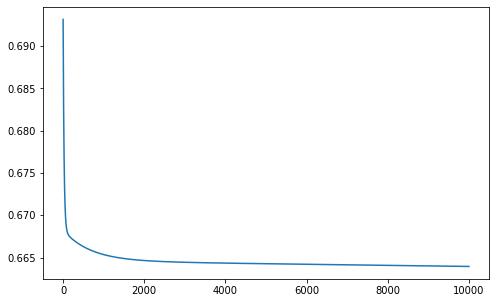

In [12]:
plt.figure(figsize=(8,5))
plt.plot(np.arange(J_history.shape[0]),J_history)
plt.show()

## Advanced Optimization

In [13]:
def gradient(theta, X, y):
    m = X.shape[0]
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    grad = (1/m)*X.T.dot(h-y)
    return (grad.flatten())

In [14]:
from scipy.optimize import minimize
#t = np.random.random((X_train.shape[1],1))
t = np.zeros((X_train.shape[1],1))
res = minimize(computeCost, t, args=(X_train.values,y_train.values), method='BFGS', jac = gradient)

/tmp/ipykernel_3391/1976904243.py:3: RuntimeWarning: divide by zero encountered in log
  J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))
/tmp/ipykernel_3391/1976904243.py:3: RuntimeWarning: divide by zero encountered in log
  J = -( 1 / m)* (np.log(sigmoid(X.dot(theta))).T.dot(y) + np.log(1 - sigmoid(X.dot(theta))).T.dot(1-y))


In [15]:
theta_opt = res.x.reshape(-1,1)

## Plot Decision Boundary

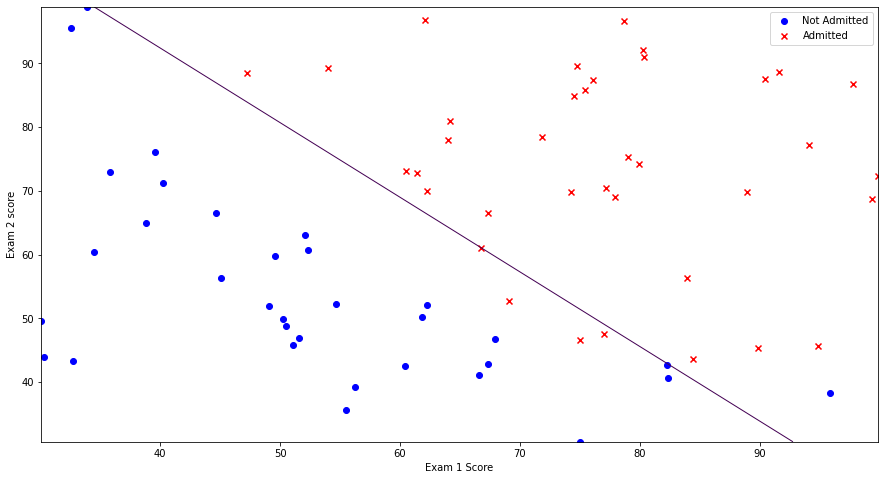

In [16]:
plt.figure(figsize=(15,8))

neg = X_train[y_train.Result == 0]
pos = X_train[y_train.Result == 1]

plt.scatter(neg.iloc[:,1].values,neg.iloc[:,2], c='b', marker='o', label='Not Admitted')
plt.scatter(pos.iloc[:,1].values,pos.iloc[:,2], c='r', marker='x', label='Admitted')

x1_min = X_train.iloc[:,1].min()
x1_max = X_train.iloc[:,1].max()
x2_min = X_train.iloc[:,2].min()
x2_max = X_train.iloc[:,2].max()

xx1,xx2 = np.meshgrid(np.linspace(x1_min,x1_max),np.linspace(x2_min,x2_max))

h = np.c_[np.ones((xx1.ravel().shape[0],1)),xx1.ravel(),xx2.ravel()].dot(theta_opt)

plt.contour(xx1,xx2,h.reshape(xx1.shape),[0.5],linewidths=1)

plt.legend()
plt.xlabel(columns[0])
plt.ylabel(columns[1])
plt.show()

## Binary Classifier Evaluation

In [17]:
h_train_score = sigmoid(X_train.dot(theta_opt))
h_train_score

,0
55,0.013350
8,0.999860
40,0.980978
29,0.002521
11,0.015224
...,...
50,0.999005
92,0.000276
16,0.318179
46,0.995298


In [18]:
threshold = 0.5
y_hat_train = h_train_score.copy()
y_hat_train[y_hat_train >= threshold] = 1
y_hat_train[y_hat_train < threshold] = 0
y_hat_train

,0
55,0.0
8,1.0
40,1.0
29,0.0
11,0.0
...,...
50,1.0
92,0.0
16,0.0
46,1.0


## Confusion Matrix

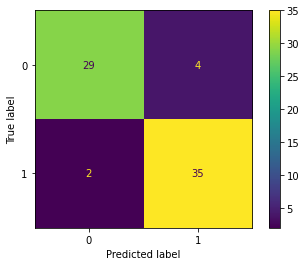

In [19]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

cm = confusion_matrix(y_train,y_hat_train)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

## Classification Report

In [20]:
from sklearn.metrics import classification_report
report = classification_report(y_train,y_hat_train)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        33
           1       0.90      0.95      0.92        37

    accuracy                           0.91        70
   macro avg       0.92      0.91      0.91        70
weighted avg       0.92      0.91      0.91        70



## Accuracy

In [21]:
from sklearn.metrics import accuracy_score

np.round(accuracy_score(y_train,y_hat_train),2)

0.91

## Precision

In [22]:
from sklearn.metrics import precision_score

np.round(precision_score(y_train,y_hat_train),2)

0.9

## Recall

In [23]:
from sklearn.metrics import recall_score

np.round(recall_score(y_train,y_hat_train),2)

0.95

## $F_1$-Score Plot

In [24]:
from sklearn.metrics import f1_score

In [25]:
thresholds = np.linspace(0,1,100)
f1_scores = []
for t in thresholds:
    y_hat_train = h_train_score.copy()
    y_hat_train[y_hat_train >= t] = 1
    y_hat_train[y_hat_train < t] = 0
    f1_scores.append(f1_score(y_train,y_hat_train))

max_threshold_idx = np.argmax(f1_scores)

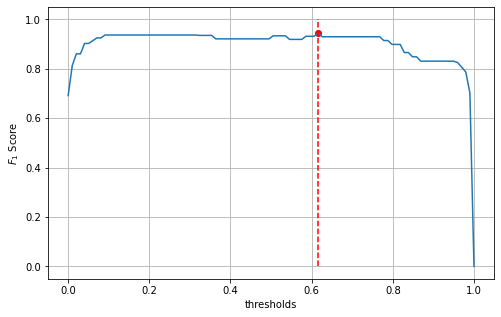

In [26]:
plt.figure(figsize=(8,5))
plt.plot(thresholds,f1_scores)
plt.scatter(thresholds[max_threshold_idx],f1_scores[max_threshold_idx], c='r')
plt.vlines(thresholds[max_threshold_idx],0,1,colors='r',linestyles='dashed')
plt.xlabel('thresholds')
plt.ylabel(r'$F_1$ Score')
plt.grid()
plt.show()

## ROC Curve and AUC

In [27]:
from sklearn.metrics import roc_curve,roc_auc_score

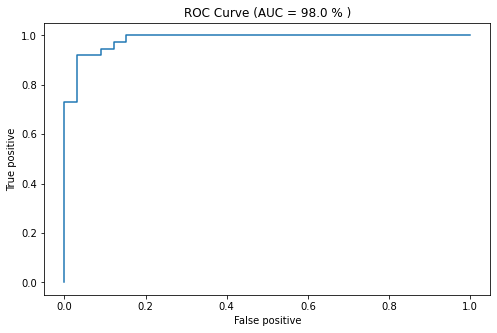

In [28]:
fpr, tpr, roc_thresholds = roc_curve(y_train,h_train_score,drop_intermediate=False)
roc_auc = np.round(roc_auc_score(y_train,h_train_score),2)

plt.figure(figsize=(8,5))
plt.plot(fpr,tpr)
plt.xlabel('False positive')
plt.ylabel('True positive')
plt.title('ROC Curve (AUC = {} % )'.format(roc_auc*100))
plt.show()

## Precision-Recall Curve

In [38]:
from sklearn.metrics import precision_recall_curve,auc

In [40]:
prec, rec, pr_thresholds = precision_recall_curve(y_train,h_train_score)
pr_auc = np.round(auc(rec,prec),2)

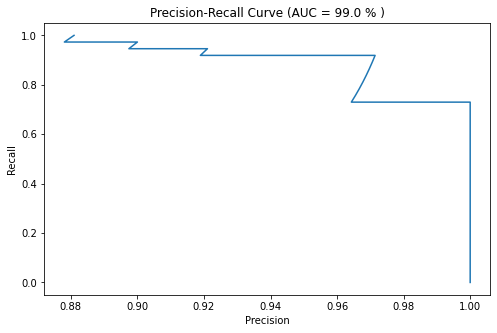

In [41]:
plt.figure(figsize=(8,5))
plt.plot(prec,rec)
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precision-Recall Curve (AUC = {} % )'.format(pr_auc*100))
plt.show()